# This script contains the following:
1. Importing libraries and data and wrangling dataframe
2. The elbow technique
3. k-means clustering

# 1. Importing Libraries, Data Frame, and Wrangling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
#Import Data
# Import data- totals with percent changes
df_state = pd.read_pickle(r'/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/totals.pkl')
df_state

,State,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change,Rate per 100K,STD Cases Mean,STI Rates
0,Alabama,1996,21949.0,4331102.0,0.000000,0.000000,506.776335,29956.526316,No Change
1,Alabama,1997,21145.0,4367935.0,0.008504,-0.036630,484.096032,29956.526316,Decreasing
2,Alabama,1998,23076.0,4404701.0,0.008417,0.091322,523.894811,29956.526316,Increasing
3,Alabama,1999,23465.0,4430141.0,0.005776,0.016857,529.667114,29956.526316,Increasing
4,Alabama,2000,27509.0,4451975.0,0.004929,0.172342,617.905536,29956.526316,Increasing
...,...,...,...,...,...,...,...,...,...
964,Wyoming,2010,0.0,563626.0,0.035563,-1.000000,0.000000,825.684211,Decreasing
965,Wyoming,2011,0.0,568158.0,0.008041,0.000000,0.000000,825.684211,No Change
966,Wyoming,2012,2150.0,576412.0,0.014528,0.000000,372.997092,825.684211,No Change
967,Wyoming,2013,2072.0,523588.0,-0.091643,-0.036279,395.730995,825.684211,Decreasing


In [4]:
#Group by year and compute the sum of each column
df = df_state.groupby('Year').sum()
df.reset_index(inplace=True)
df


,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change,Rate per 100K,STD Cases Mean
0,1996,825001.0,257762659.0,0.000000,0.000000,14157.449140,1.346031e+06
1,1997,868580.0,260819180.0,0.343122,0.293763,15194.850740,1.346031e+06
2,1998,969033.0,264893931.0,0.651391,5.331911,17527.351724,1.346031e+06
3,1999,1024577.0,267989044.0,0.420986,-0.956650,17518.404846,1.346031e+06
4,2000,1069448.0,281969168.0,1.823547,-0.451043,17162.799023,1.346031e+06
5,2001,1144665.0,285145197.0,0.478988,3.505638,18391.359291,1.346031e+06
6,2002,1181341.0,288124260.0,0.622897,1.442307,18506.169077,1.346031e+06
7,2003,1216084.0,290754225.0,0.517758,1.151788,20017.709980,1.346031e+06
8,2004,1262818.0,293378177.0,0.378641,0.587136,20773.444818,1.346031e+06
9,2005,1323502.0,296356208.0,0.578678,1.214187,21798.943594,1.346031e+06


In [5]:
#drop non-numerical columns and columns needed to revise
df.drop(['Population Percent Change', 'STD Cases Percent Change','Rate per 100K'], axis=1, inplace = True)
df

,Year,STD Cases,Population,STD Cases Mean
0,1996,825001.0,257762659.0,1.346031e+06
1,1997,868580.0,260819180.0,1.346031e+06
2,1998,969033.0,264893931.0,1.346031e+06
3,1999,1024577.0,267989044.0,1.346031e+06
4,2000,1069448.0,281969168.0,1.346031e+06
5,2001,1144665.0,285145197.0,1.346031e+06
6,2002,1181341.0,288124260.0,1.346031e+06
7,2003,1216084.0,290754225.0,1.346031e+06
8,2004,1262818.0,293378177.0,1.346031e+06
9,2005,1323502.0,296356208.0,1.346031e+06


In [6]:
#determine population percent change, STD Cases percent Change, and Rate per 100k 
df['Population Percent Change'] = df['Population'].pct_change() * 100
df['STD Cases Percent Change'] = df['STD Cases'].pct_change() * 100
df['Rate per 100k'] = df['STD Cases'] / df['Population'] * 100000
df

,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100k
0,1996,825001.0,257762659.0,1.346031e+06,NaN,NaN,320.062263
1,1997,868580.0,260819180.0,1.346031e+06,1.185789,5.282297,333.019987
2,1998,969033.0,264893931.0,1.346031e+06,1.562290,11.565198,365.819253
3,1999,1024577.0,267989044.0,1.346031e+06,1.168435,5.731900,382.320480
4,2000,1069448.0,281969168.0,1.346031e+06,5.216677,4.379466,379.278347
5,2001,1144665.0,285145197.0,1.346031e+06,1.126375,7.033255,401.432327
6,2002,1181341.0,288124260.0,1.346031e+06,1.044753,3.204082,410.010945
7,2003,1216084.0,290754225.0,1.346031e+06,0.912788,2.940980,418.251532
8,2004,1262818.0,293378177.0,1.346031e+06,0.902464,3.842991,430.440332
9,2005,1323502.0,296356208.0,1.346031e+06,1.015083,4.805443,446.591623


In [7]:
#set Nan to 0
df = df.fillna(0)
df

,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100k
0,1996,825001.0,257762659.0,1.346031e+06,0.000000,0.000000,320.062263
1,1997,868580.0,260819180.0,1.346031e+06,1.185789,5.282297,333.019987
2,1998,969033.0,264893931.0,1.346031e+06,1.562290,11.565198,365.819253
3,1999,1024577.0,267989044.0,1.346031e+06,1.168435,5.731900,382.320480
4,2000,1069448.0,281969168.0,1.346031e+06,5.216677,4.379466,379.278347
5,2001,1144665.0,285145197.0,1.346031e+06,1.126375,7.033255,401.432327
6,2002,1181341.0,288124260.0,1.346031e+06,1.044753,3.204082,410.010945
7,2003,1216084.0,290754225.0,1.346031e+06,0.912788,2.940980,418.251532
8,2004,1262818.0,293378177.0,1.346031e+06,0.902464,3.842991,430.440332
9,2005,1323502.0,296356208.0,1.346031e+06,1.015083,4.805443,446.591623


In [8]:
df.to_csv('/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/Totals_national.csv')

# 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/joshd/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshd/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshd/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshd/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/j

[-6433415539718272.0,
 -1736505889207124.8,
 -499856895818420.2,
 -246044080666173.12,
 -165397228291481.3,
 -114542211211611.53,
 -65999131854599.33,
 -53223627747072.414,
 -40261815343597.75]

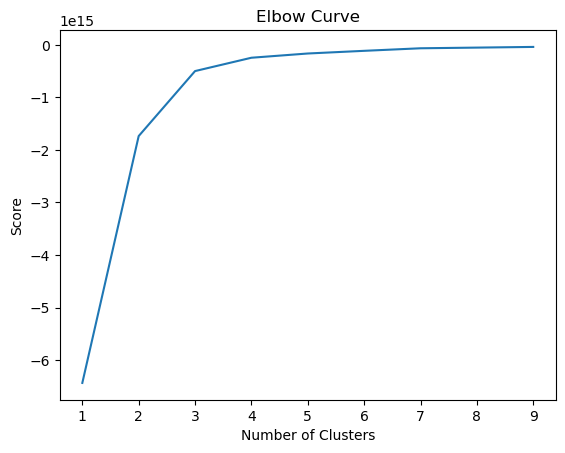

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### The elbow curves at 3, so I will use that value. 

# 3. k-means clustering

In [12]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3, n_init = 1)


In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3, n_init=1)

In [14]:
df['clusters'] = kmeans.fit_predict(df)

In [15]:
df.head()

,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100k,clusters
0,1996,825001.0,257762659.0,1.346031e+06,0.000000,0.000000,320.062263,1
1,1997,868580.0,260819180.0,1.346031e+06,1.185789,5.282297,333.019987,1
2,1998,969033.0,264893931.0,1.346031e+06,1.562290,11.565198,365.819253,1
3,1999,1024577.0,267989044.0,1.346031e+06,1.168435,5.731900,382.320480,1
4,2000,1069448.0,281969168.0,1.346031e+06,5.216677,4.379466,379.278347,0


In [16]:
df['clusters'].value_counts()

2    8
0    7
1    4
Name: clusters, dtype: int64

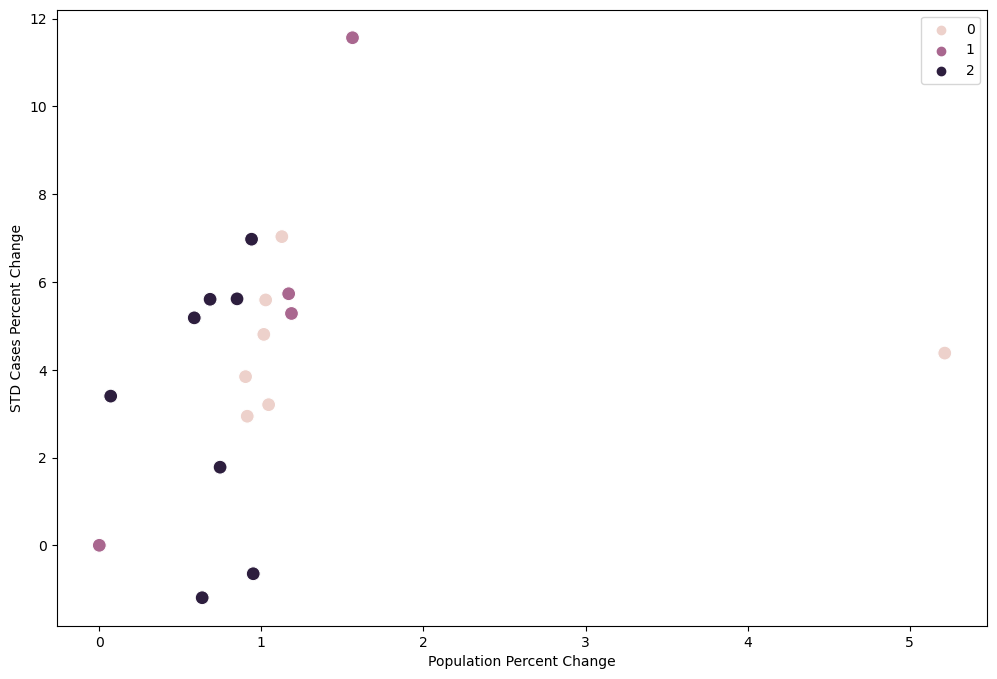

In [17]:
# Plot the clusters for the "Population Percnet Change" and "STD Cases Percent Change" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Population Percent Change'], y=df['STD Cases Percent Change'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population Percent Change') # Label x-axis.
plt.ylabel('STD Cases Percent Change') # Label y-axis.
plt.show()

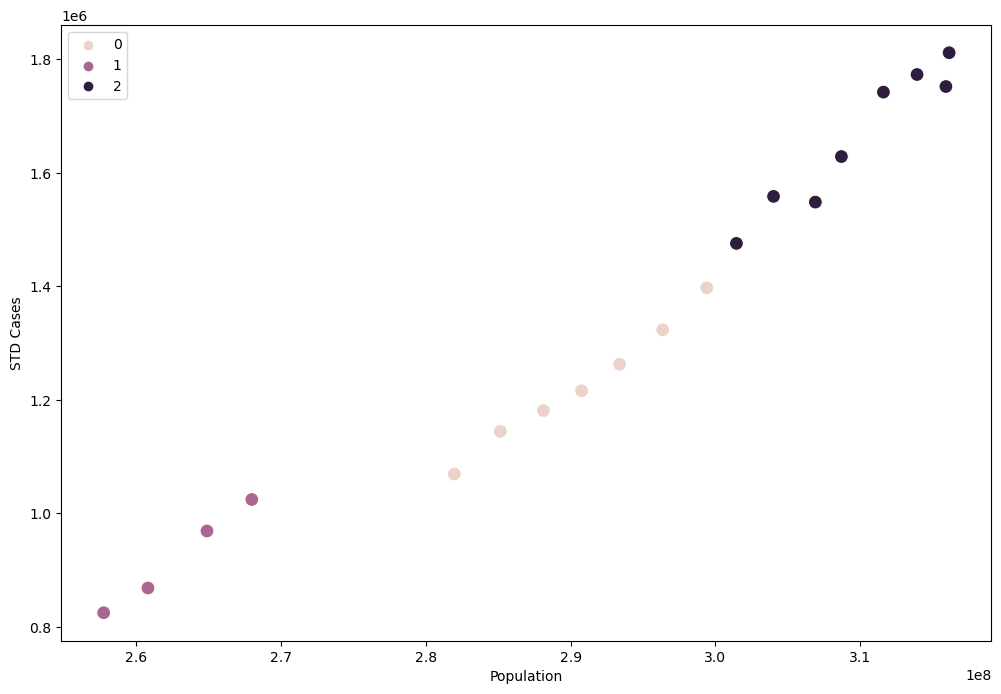

In [18]:
# Plot the clusters for the "Population" and "STD Cases" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Population'], y=df['STD Cases'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Population') 
plt.ylabel('STD Cases') 
plt.show()

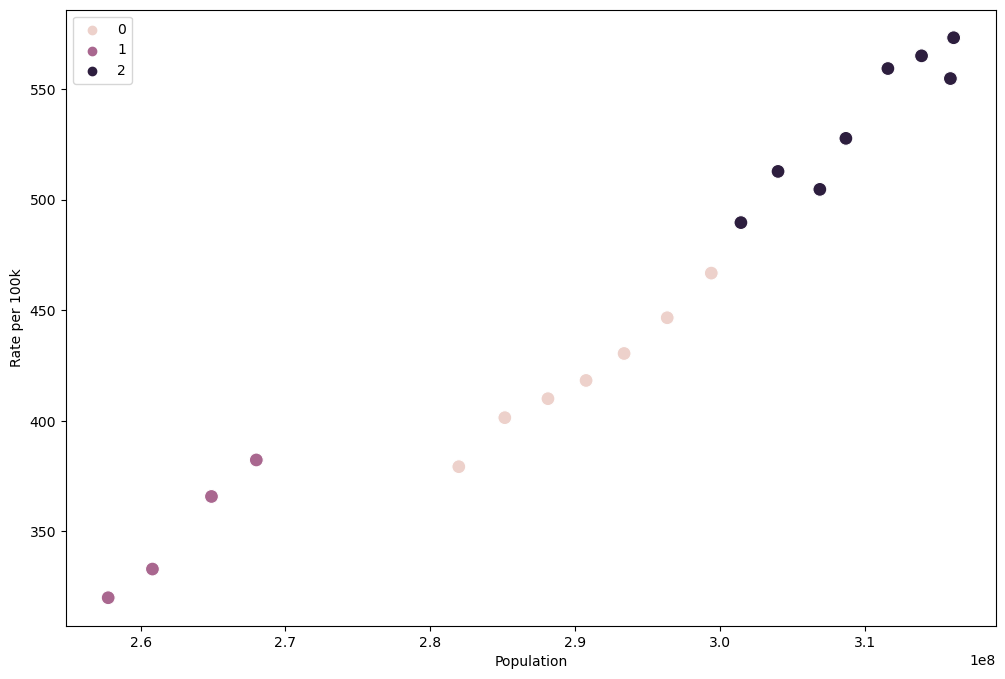

In [19]:
# Plot the clusters for the "Population" and "Rate per 100K" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Population'], y=df['Rate per 100k'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Population') 
plt.ylabel('Rate per 100k') 
plt.show()

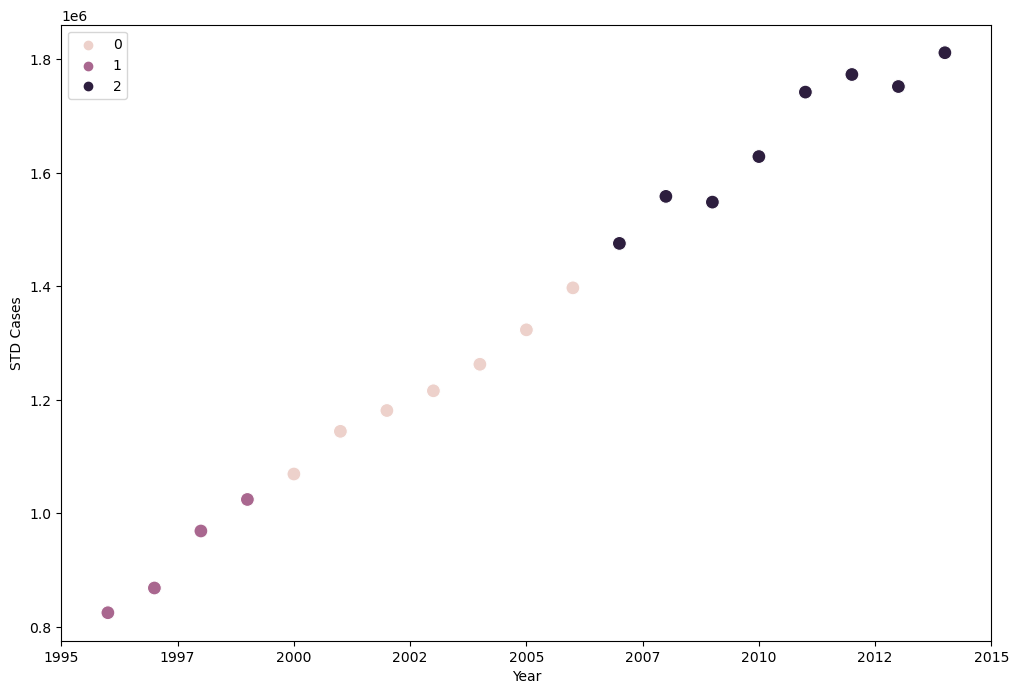

In [20]:
# Plot the clusters for the "Year" and "STD Cases" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['STD Cases'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year')
plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
plt.ylabel('STD Cases') 
plt.show()

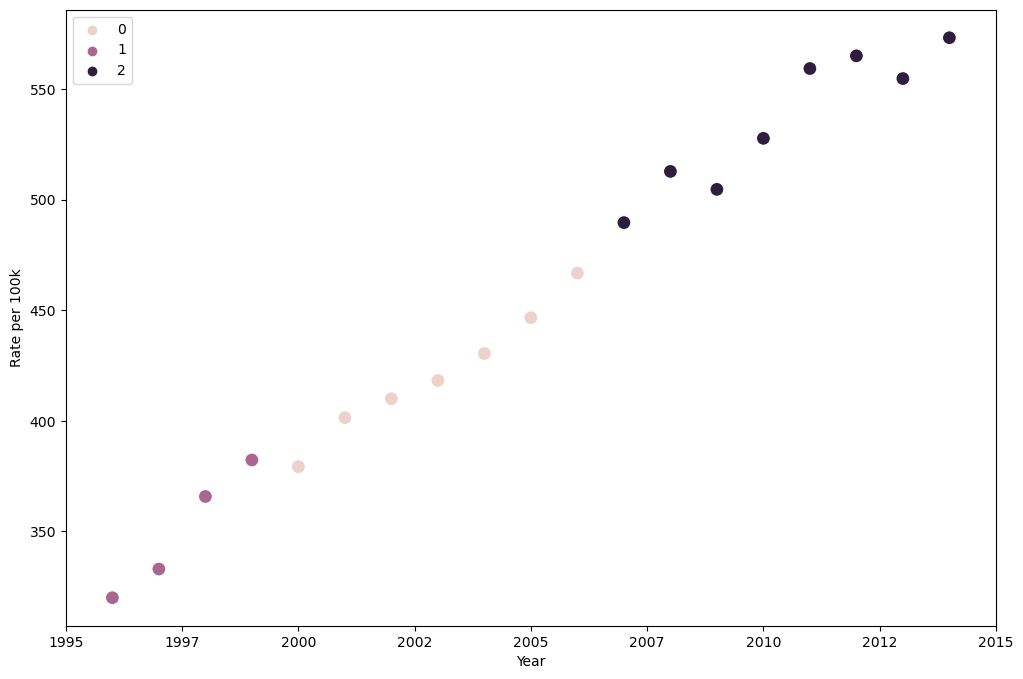

In [21]:
# Plot the clusters for the "Year" and "Rate per 100k" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['Rate per 100k'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year')
plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
plt.ylabel('Rate per 100k') 
plt.show()

Altough there were not a lot of data points, the results were still useful.  In all scatterplots, save for the first one there is a definitel upwards trend among cases and year.  I thought the "Population Percent Change" and "STD Cases Percent Change"  would be a bit more useful, but after reworking the data my correlation was done signigicatnly in this area.  All show an unproportional increase of disease as both population and the years increase. 

In [22]:
df.loc[df['clusters'] == 2, 'cluster'] = 'black'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [23]:
df.groupby('cluster').agg({'STD Cases':['mean', 'median'], 
                         'STD Cases Percent Change':['mean', 'median'], 
                         'Population Percent Change':['mean', 'median'],
                          'Rate per 100k':['mean', 'median']})

STD Cases            STD Cases Percent Change            \
               mean     median                     mean    median   
cluster                                                             
black    1661506.50  1685658.0                 3.339276  4.290849   
pink     1227907.00  1216084.0                 4.542373  4.379466   
purple    921797.75   918806.5                 5.644849  5.507098   

        Population Percent Change           Rate per 100k              
                             mean    median          mean      median  
cluster                                                                
black                    0.682341  0.714397    535.819989  541.174115  
pink                     1.606386  1.026561    421.824476  418.251532  
purple                   0.979128  1.177112    350.305496  349.419620

On a national level the clusters point to more cases, more percent changes with the purple.  The rates who a much lareger incrase with the purple also. 